# Introdução a Redes Neurais
## Atividade 01

#### Implementação da primeira RNA aplicada a classificação de dados de peso e altura de acorodo com o IMC

Import das bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Definição das variáveis do DataFrame:

In [2]:
n_pts = 50
peso =[]
altura = []
imc = []
estado = []
for i in range(n_pts):
    delta_peso = abs(np.random.randn())
    peso.append(40 + 30*delta_peso)    
    delta_altura = abs(np.random.randn())
    altura.append( 1.30 + 0.3*delta_altura)
    imc.append(peso[-1] / (altura[-1] * altura[-1] ))  
    if imc[-1] < 18.5:
        estado.append('Magro')
    if imc[-1] >= 18.5 and imc[-1] < 25.0:
        estado.append('Normal')
    if imc[-1] >= 25.0 and imc[-1] < 30.0:
        estado.append('Sobrepeso')
    if imc[-1] >= 30.0:
        estado.append('Obeso')

data = {'Peso':peso,'Altura':altura,'IMC':imc, 'Estado': estado}
df = pd.DataFrame(data)
df

,Peso,Altura,IMC,Estado
0,92.988299,1.320722,53.309601,Obeso
1,49.692249,1.476959,22.779912,Normal
2,58.680313,1.398420,30.006636,Obeso
3,45.858647,1.492826,20.577998,Normal
4,41.521983,1.339661,23.135994,Normal
5,43.078065,1.644470,15.929573,Magro
6,50.914684,1.893652,14.198507,Magro
7,51.295011,1.498925,22.830501,Normal
8,54.006941,1.455428,25.495778,Sobrepeso
9,47.818363,1.495058,21.393345,Normal


Plot do conjuto de dados:

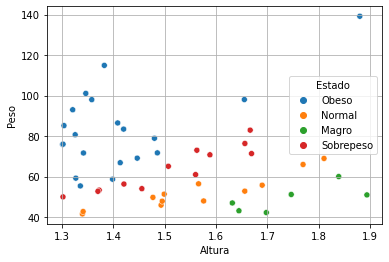

In [3]:
sns.scatterplot(x='Altura', y='Peso', hue='Estado', data=df) 
plt.grid()
plt.show()

Principais informações estatísticas dos dados:

In [4]:
df.describe()

,Peso,Altura,IMC
count,50.000000,50.000000,50.000000
mean,67.009177,1.510454,30.526354
std,20.215859,0.168647,11.511281
min,41.521983,1.300977,14.198507
25%,51.644203,1.360883,21.739987
50%,63.005519,1.482791,28.186406
75%,76.238483,1.652362,35.968798
max,139.197170,1.893652,60.139066


Os dados devem ser classificados nos estados: Magro, Normal, Obeso e Sobrepeso. A classificação adequada dos dados deveria ser feita por meio da construção de uma RNA utilizando mais de um neurônio na mesma camada. Porém, como atualmente estamos trabalhando com neurônios de forma individual, apenas é possível a tomada de decisão do tipo "sim" ou "não", "0" ou "1"...

Deste modo, a seguinte estrutura foi pensada para a resolução deste problema:

<img src="files/fig03.png">

Cada um dos estados será classificado de forma individual, com base em apenas um neurônio e RNAs independentes.

#### Etapa 01: Criação da rede de neurônios

In [5]:
def parametros(learning_rate):
#     np.random.seed(0) 
    weights = np.array([np.random.randn(), np.random.randn(), np.random.randn()])
    bias = np.random.randn()
    learning_rate = learning_rate
    return weights, bias, learning_rate
        
def _sigmoid(x):
    return (1 / (1 + np.exp(-x)))
    
def _sigmoid_deriv(x):
    return (_sigmoid(x) * (1 - _sigmoid(x)))
        
def _htangent(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 
#     return np.tanh(x)
    
def _htangent_deriv(x):
    return (1 - (_htangent(x))**2)
#     return (np.sinh(x))**2

def predict(input_vector, weights, bias, f_at):        
    layer_1 = np.dot(input_vector, weights) + bias
    if f_at == 'sigmoide' or f_at == '':
        layer_2 = _sigmoid(layer_1)
    elif f_at == 'tangent':
        layer_2 = _htangent(layer_1)  
    else:
        print("ERROR")
    prediction = layer_2
    return prediction, layer_1, layer_2
    
def erro(target, prediction):
    error = (1/2)*(target - prediction) ** 2
    return error

def _compute_gradients(input_vector, prediction, target, weights, bias, f_at):
    layer_1 = np.dot(input_vector, weights) + bias
    if f_at == 'sigmoide' or f_at == '':
        dprediction_dlayer1 = _sigmoid_deriv(layer_1)
    elif f_at == 'tangent':
        dprediction_dlayer1 = _htangent_deriv(layer_1)
    else:
        print("ERROR")
    derror_dprediction = prediction - target
    dlayer1_dbias = 1
    dlayer1_dweights = (0 * weights) + (1 * input_vector)
    derror_dweights = derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
    derror_dbias = derror_dprediction * dprediction_dlayer1 * dlayer1_dbias        
    return derror_dweights, derror_dbias, derror_dprediction, dprediction_dlayer1, dlayer1_dbias, dlayer1_dweights
    
def _update_parameters(derror_dbias, derror_dweights, bias, weights, learning_rate):
    bias = bias - (derror_dbias * learning_rate)        
    weights = weights - (derror_dweights * learning_rate)        
    return bias, weights

#### Etapa 02: Treinamento de cada RNA 

##### RNA 01: Estado = Magro

Adicionar coluna que indicará a saída da RNA 01. Se na coluna Estado, o item for igual a Magro, então output é igual a 1. Caso contrário, será igual a zero.

In [6]:
df.loc[df['Estado'] == 'Magro', 'Output'] = 1
df.loc[df['Estado'] != 'Magro', 'Output'] = 0
display(df)

,Peso,Altura,IMC,Estado,Output
0,92.988299,1.320722,53.309601,Obeso,0.0
1,49.692249,1.476959,22.779912,Normal,0.0
2,58.680313,1.398420,30.006636,Obeso,0.0
3,45.858647,1.492826,20.577998,Normal,0.0
4,41.521983,1.339661,23.135994,Normal,0.0
5,43.078065,1.644470,15.929573,Magro,1.0
6,50.914684,1.893652,14.198507,Magro,1.0
7,51.295011,1.498925,22.830501,Normal,0.0
8,54.006941,1.455428,25.495778,Sobrepeso,0.0
9,47.818363,1.495058,21.393345,Normal,0.0


Dados de entrada da RNA 01:

In [7]:
learning_rate = 0.001
param = parametros(learning_rate)
weights = param[0]
bias = param[1]
target = np.array(df['Output'])
input_vector = np.array([df['Peso'], df['Altura'], df['IMC']])
net_error_total = []
gradiente = 0
derror_dweights = 0
derror_dbias = 0
f_activation = 'sigmoide'

Treinamento da RNA 01:

In [8]:
for k in range(1000):
    gradiente = 0
    derror_dweights = 0
    derror_dbias = 0
    error_total = 0
    pred_final =[]
    for i in range(len(target)):         
        pred = predict(input_vector[0:3,i], weights, bias, f_activation)
        pred_final.append(pred[0])        
        prediction = pred[0]        
        error = erro(target[i], prediction)         
        error_total = error_total + error         
        gradiente = _compute_gradients(input_vector[0:3,i], prediction, target[i], weights, bias, f_activation)         
        derror_dweights = derror_dweights + gradiente[0]
        derror_dbias = derror_dbias + gradiente[1] 
    net_error_total.append(error_total)
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights, learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]

Plot dos resultados do treinamento da RNA 01:

Text(0.5, 0, 'Iterações')

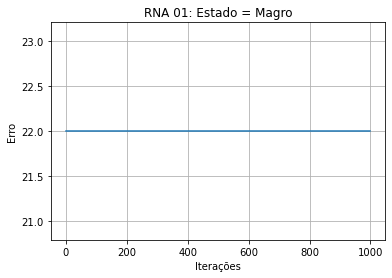

In [9]:
plt.plot(net_error_total)
plt.grid()
plt.title('RNA 01: Estado = Magro')
plt.ylabel('Erro')
plt.xlabel('Iterações')

Resultados da RNA 02:

In [10]:
print(f"Resultado das predições (RNA 01): {pred_final}")
print(" ")
print(f"Valores alvo (RNA 01): {target}")

Resultado das predições (RNA 01): [1.0, 1.0, 1.0, 0.9999999999999993, 0.9999999999999358, 0.999999999999998, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999731, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999969]
 
Valores alvo (RNA 01): [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]


##### RNA 02: Estado = Normal

Adicionar coluna que indicará a saída da RNA 02. Se na coluna Estado, o item for igual a Normal, então output é igual a 1. Caso contrário, será igual a zero.

In [11]:
df.loc[df['Estado'] == 'Normal', 'Output'] = 1
df.loc[df['Estado'] != 'Normal', 'Output'] = 0
display(df)

,Peso,Altura,IMC,Estado,Output
0,92.988299,1.320722,53.309601,Obeso,0.0
1,49.692249,1.476959,22.779912,Normal,1.0
2,58.680313,1.398420,30.006636,Obeso,0.0
3,45.858647,1.492826,20.577998,Normal,1.0
4,41.521983,1.339661,23.135994,Normal,1.0
5,43.078065,1.644470,15.929573,Magro,0.0
6,50.914684,1.893652,14.198507,Magro,0.0
7,51.295011,1.498925,22.830501,Normal,1.0
8,54.006941,1.455428,25.495778,Sobrepeso,0.0
9,47.818363,1.495058,21.393345,Normal,1.0


Dados de entrada da RNA 02:

In [12]:
learning_rate = 0.001
param = parametros(learning_rate)
weights = param[0]
bias = param[1]
target = np.array(df['Output'])
input_vector = np.array([df['Peso'], df['Altura'], df['IMC']])
net_error_total = []
gradiente = 0
derror_dweights = 0
derror_dbias = 0
f_activation = 'sigmoide'

Treinamento da RNA 02:

In [13]:
for k in range(1000):
    gradiente = 0
    derror_dweights = 0
    derror_dbias = 0
    error_total = 0
    pred_final =[]
    for i in range(len(target)):         
        pred = predict(input_vector[0:3,i], weights, bias, f_activation)
        pred_final.append(pred[0])        
        prediction = pred[0]        
        error = erro(target[i], prediction)         
        error_total = error_total + error         
        gradiente = _compute_gradients(input_vector[0:3,i], prediction, target[i], weights, bias, f_activation)         
        derror_dweights = derror_dweights + gradiente[0]
        derror_dbias = derror_dbias + gradiente[1] 
    net_error_total.append(error_total)
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights, learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]

Plot dos resultados do treinamento da RNA 02:

Text(0.5, 0, 'Iterações')

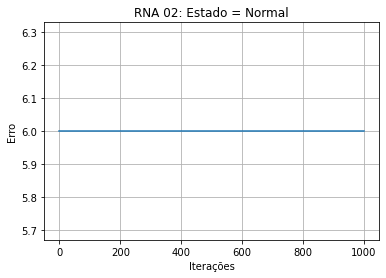

In [14]:
plt.plot(net_error_total)
plt.grid()
plt.title('RNA 02: Estado = Normal')
plt.ylabel('Erro')
plt.xlabel('Iterações')

Resultados da RNA 02:

In [15]:
print(f"Resultado das predições (RNA 02): {pred_final}")
print(" ")
print(f"Valores alvo (RNA 02): {target}")

Resultado das predições (RNA 02): [3.0306097807566362e-28, 4.4196285248745615e-18, 9.484553007430476e-20, 6.073322940112334e-17, 3.496216780703996e-13, 1.2590931511111475e-17, 4.940999357049141e-23, 5.54418580405322e-19, 3.014400678805457e-19, 1.1214431446101855e-17, 5.540368947762253e-31, 1.7877089144269517e-22, 2.7827813219967223e-24, 1.4439285352396208e-13, 1.6390977328385166e-26, 4.310226157289682e-24, 4.772945147018403e-26, 8.991887185751651e-23, 9.149346219731735e-19, 1.7493922181637253e-22, 7.112870135421232e-22, 1.310070422491063e-39, 4.7602348991531374e-30, 1.1800819524422589e-27, 5.70075050561551e-15, 5.110847472145702e-19, 1.7852284703800336e-23, 2.151426491462085e-19, 1.474484570211453e-37, 1.6895286168138634e-28, 1.0422713671985043e-31, 4.681554812304726e-28, 1.3398668995684145e-21, 2.5952659076629024e-28, 3.346804897444479e-31, 3.6035865967764927e-23, 1.5514549311818556e-61, 1.496647484318358e-22, 3.5437241875351985e-29, 1.8061203725800314e-17, 2.7454247966648974e-25, 3.4

##### RNA 03: Estado = Obeso

Adicionar coluna que indicará a saída da RNA 03. Se na coluna Estado, o item for igual a Obeso, então output é igual a 1. Caso contrário, será igual a zero.

In [16]:
df.loc[df['Estado'] == 'Obeso', 'Output'] = 1
df.loc[df['Estado'] != 'Obeso', 'Output'] = 0
display(df)

,Peso,Altura,IMC,Estado,Output
0,92.988299,1.320722,53.309601,Obeso,1.0
1,49.692249,1.476959,22.779912,Normal,0.0
2,58.680313,1.398420,30.006636,Obeso,1.0
3,45.858647,1.492826,20.577998,Normal,0.0
4,41.521983,1.339661,23.135994,Normal,0.0
5,43.078065,1.644470,15.929573,Magro,0.0
6,50.914684,1.893652,14.198507,Magro,0.0
7,51.295011,1.498925,22.830501,Normal,0.0
8,54.006941,1.455428,25.495778,Sobrepeso,0.0
9,47.818363,1.495058,21.393345,Normal,0.0


Dados de entrada da RNA 03:

In [17]:
learning_rate = 0.001
param = parametros(learning_rate)
weights = param[0]
bias = param[1]
target = np.array(df['Output'])
input_vector = np.array([df['Peso'], df['Altura'], df['IMC']])
net_error_total = []
gradiente = 0
derror_dweights = 0
derror_dbias = 0
f_activation = 'sigmoide'

Treinamento da RNA 03:

In [18]:
for k in range(1000):
    gradiente = 0
    derror_dweights = 0
    derror_dbias = 0
    error_total = 0
    pred_final =[]
    for i in range(len(target)):         
        pred = predict(input_vector[0:3,i], weights, bias, f_activation)
        pred_final.append(pred[0])        
        prediction = pred[0]        
        error = erro(target[i], prediction)         
        error_total = error_total + error         
        gradiente = _compute_gradients(input_vector[0:3,i], prediction, target[i], weights, bias, f_activation)         
        derror_dweights = derror_dweights + gradiente[0]
        derror_dbias = derror_dbias + gradiente[1] 
    net_error_total.append(error_total)
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights, learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]

Plot dos resultados do treinamento da RNA 03:

Text(0.5, 0, 'Iterações')

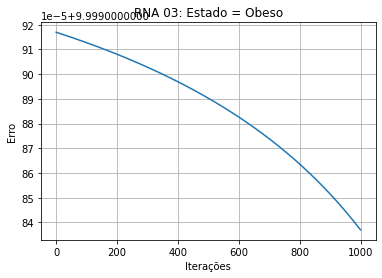

In [19]:
plt.plot(net_error_total)
plt.grid()
plt.title('RNA 03: Estado = Obeso')
plt.ylabel('Erro')
plt.xlabel('Iterações')

Resultados da RNA 03:

In [20]:
print(f"Resultado das predições (RNA 03): {pred_final}")
print(" ")
print(f"Valores alvo (RNA 03): {target}")

Resultado das predições (RNA 03): [8.521412277796097e-07, 2.3024379669389842e-07, 8.716877709753692e-07, 3.655665458521692e-07, 0.00023798001924275165, 1.3625049245827292e-08, 3.2355843777560502e-12, 6.804728655407159e-08, 1.8056486903139208e-07, 2.0018627920863266e-07, 5.4359611462882086e-14, 2.7590316154124023e-06, 7.624046644253067e-09, 0.00019005436721043902, 1.5979003620451057e-13, 1.102501763552404e-09, 5.096646029118198e-10, 7.630962099296273e-08, 1.552502534011744e-08, 3.4020551047024494e-05, 5.893104744083976e-11, 2.036393213852963e-17, 6.4182513305395425e-15, 5.9990673452972245e-12, 0.0004869581469682492, 4.708849412460681e-09, 4.208392352328619e-10, 4.926449609342717e-07, 6.974446640972753e-11, 1.5172408134702137e-09, 2.4616710941358313e-08, 8.718434992067053e-12, 3.0211852116087976e-10, 7.154526189328801e-14, 1.3341697898302514e-08, 3.9550267170449923e-11, 9.325072124674589e-30, 3.098839934379568e-05, 1.8096276573458372e-09, 8.563902338672592e-06, 1.0054092312867673e-05, 2.

##### RNA 04: Estado = Sobrepeso

Adicionar coluna que indicará a saída da RNA 04. Se na coluna Estado, o item for igual a Sobrepeso, então output é igual a 1. Caso contrário, será igual a zero.

In [21]:
df.loc[df['Estado'] == 'Sobrepeso', 'Output'] = 1
df.loc[df['Estado'] != 'Sobrepeso', 'Output'] = 0
display(df)

,Peso,Altura,IMC,Estado,Output
0,92.988299,1.320722,53.309601,Obeso,0.0
1,49.692249,1.476959,22.779912,Normal,0.0
2,58.680313,1.398420,30.006636,Obeso,0.0
3,45.858647,1.492826,20.577998,Normal,0.0
4,41.521983,1.339661,23.135994,Normal,0.0
5,43.078065,1.644470,15.929573,Magro,0.0
6,50.914684,1.893652,14.198507,Magro,0.0
7,51.295011,1.498925,22.830501,Normal,0.0
8,54.006941,1.455428,25.495778,Sobrepeso,1.0
9,47.818363,1.495058,21.393345,Normal,0.0


Dados de entrada da RNA 04:

In [22]:
learning_rate = 0.001
param = parametros(learning_rate)
weights = param[0]
bias = param[1]
target = np.array(df['Output'])
input_vector = np.array([df['Peso'], df['Altura'], df['IMC']])
net_error_total = []
gradiente = 0
derror_dweights = 0
derror_dbias = 0
f_activation = 'sigmoide'

Treinamento da RNA 04:

In [23]:
for k in range(1000):
    gradiente = 0
    derror_dweights = 0
    derror_dbias = 0
    error_total = 0
    pred_final =[]
    for i in range(len(target)):         
        pred = predict(input_vector[0:3,i], weights, bias, f_activation)
        pred_final.append(pred[0])        
        prediction = pred[0]        
        error = erro(target[i], prediction)         
        error_total = error_total + error         
        gradiente = _compute_gradients(input_vector[0:3,i], prediction, target[i], weights, bias, f_activation)         
        derror_dweights = derror_dweights + gradiente[0]
        derror_dbias = derror_dbias + gradiente[1] 
    net_error_total.append(error_total)
    atualiza =_update_parameters(derror_dbias, derror_dweights, bias, weights, learning_rate)
    bias = atualiza[0]
    weights = atualiza[1]

Plot dos resultados do treinamento da RNA 04:

Text(0.5, 0, 'Iterações')

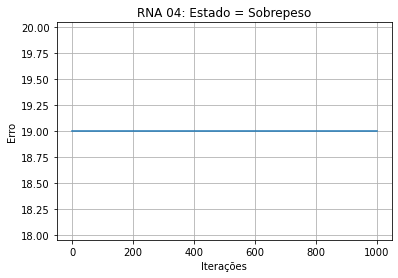

In [24]:
plt.plot(net_error_total)
plt.grid()
plt.title('RNA 04: Estado = Sobrepeso')
plt.ylabel('Erro')
plt.xlabel('Iterações')

Resultados da RNA 04:

In [25]:
print(f"Resultado das predições (RNA 04): {pred_final}")
print(" ")
print(f"Valores alvo (RNA 04): {target}")

Resultado das predições (RNA 04): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 
Valores alvo (RNA 04): [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0.]
